In [490]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [491]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 import
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import random

print(tf.__version__)

2.1.0


In [492]:
class_names = os.listdir("./feature/")
class_names.sort()

print(class_names)

['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019740014_leesumin', '2017019740015_choihayoung', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeonsanghyeok', '2017019770006_jennie', '2017019770007_simseungmin', '2017019770008_parksomi', '2017019770009_yuminji', '2017019770010_parksojin', '2017019770011_kwonyeonwoo', '2017019770012_ladakyeong', '2017019770013_janghyomin', '2017019770014_parkeunbi', '2017019770015_parkdayeung', '2017019770016_parkjongae', '2017019770017_hansohee', '2017019770018_janggyeoul', '2017019770019_leewooju', '2017019770020_nomyungok', '2017019770021_heoyoonjung',

In [493]:
x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir("./feature/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("./feature/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)


2017019740001
2017019740001_kwakjuheon_11.npy 0
2017019740001_kwakjuheon_13.npy 1
2017019740001_kwakjuheon_4.npy 2
2017019740001_kwakjuheon_1.npy 3
2017019740001_kwakjuheon_0.npy 4
2017019740001_kwakjuheon_6.npy 5
2017019740001_kwakjuheon_9.npy 6
2017019740001_kwakjuheon_10.npy 7
2017019740001_kwakjuheon_2.npy 8
2017019740001_kwakjuheon_7.npy 9
2017019740001_kwakjuheon_12.npy 10
2017019740001_kwakjuheon_8.npy 11
2017019740001_kwakjuheon_3.npy 12
2017019740001_kwakjuheon_14.npy 13
2017019740001_kwakjuheon_5.npy 14
2017019740002
2017019740002_kimjiho_5.npy 0
2017019740002_kimjiho_14.npy 1
2017019740002_kimjiho_11.npy 2
2017019740002_kimjiho_3.npy 3
2017019740002_kimjiho_10.npy 4
2017019740002_kimjiho_1.npy 5
2017019740002_kimjiho_2.npy 6
2017019740002_kimjiho_7.npy 7
2017019740002_kimjiho_4.npy 8
2017019740002_kimjiho_0.npy 9
2017019740002_kimjiho_6.npy 10
2017019740002_kimjiho_8.npy 11
2017019740002_kimjiho_12.npy 12
2017019740002_kimjiho_9.npy 13
2017019740002_kimjiho_13.npy 14
2017019

In [503]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense 
from keras.models import Model
from keras.layers import Dense, Embedding, Input, Activation, Dropout, Reshape, concatenate
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier 
import sklearn
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict
from keras.layers import Conv1D, Conv2D
from keras.layers import MaxPooling1D, MaxPooling3D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import Adadelta
import numpy

# Function to create model, required for KerasClassifier 
def create_model(X_train, X_val, y_train, y_val): 
    # create model 
    conv21 = keras.models.Sequential()
    conv21.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(X_train.shape[1], X_train.shape[2], 1)))
    # conv2.add(MaxPooling2D((2, 2)))
    conv21.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
    conv21.add(keras.layers.MaxPooling2D((2, 2)))
    conv21.add(keras.layers.Dropout(0.25))
    conv21.add(keras.layers.Flatten())
    conv21.add(keras.layers.Dense(128, activation="relu"))
    conv21.add(keras.layers.Dropout(0.25))
    conv21.add(keras.layers.Dense(y_val.shape[1], activation="softmax"))
    conv21.summary()
    conv21.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     print("X_val : ", X_val.shape)
#     print("y_val : ", y_val.shape)
    val_acc = conv21.evaluate(X_val, y_val, batch_size=16, verbose = 1)
#     history = conv21.fit(X_val, y_val, batch_size=4, epochs=50, verbose=1, validation_data=(x_val, y_val_encoded))
    return conv21, val_acc

In [513]:
n_folds = 10
cv_scores, model_history = list(), list()
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = np.array(x_list)
y_train = np.array(y_list)

for i in range(4):
    print("\n================")
    print("| Number : " , i, " |")
    print("================")
    # split data    
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.25, test_size=0.33, random_state = 32, shuffle=True)
#     x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=50, shuffle=True)
    # evaluate model
    print("x_train: ", x_train.shape)
    print("y_train: ", y_train.shape)
    print("x_val: ", x_val.shape)
    print("y_val: ", y_val.shape)

    print("-----------------------")
    y_train_encoded = tf.keras.utils.to_categorical(y_train)
    y_val_encoded = tf.keras.utils.to_categorical(y_val)
    
    
    x_train = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1)
    x_val   = x_val.reshape(-1, x_val.shape[1], x_val.shape[2], 1)


    x_train = x_train - np.min(x_train)

    x_train = x_train / np.max(x_train)

    x_val = x_val - np.min(x_val)
    x_val = x_val / np.max(x_val)
    print("y_train_encoded:", y_train_encoded.shape)
    print("y_val_encoded:", y_val_encoded.shape)
    print("-----------------------")
    
    model, val_acc = create_model(x_train, x_val, y_train_encoded, y_val_encoded)
    print("x_train: ", x_train.shape)
    print("y_train: ", y_train.shape)
    print("x_val: ", x_val.shape)
    print("y_val: ", y_val.shape)

    
    print("val_acc : ", val_acc)
    cv_scores.append(val_acc)
    model_history.append(model)
    
    
    
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))


| Number :  0  |
x_train:  (112, 469, 12)
y_train:  (112,)
x_val:  (149, 469, 12)
y_val:  (149,)
-----------------------
y_train_encoded: (112, 49)
y_val_encoded: (149, 50)
-----------------------
Model: "sequential_319"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_651 (Conv2D)          (None, 469, 12, 32)       320       
_________________________________________________________________
conv2d_652 (Conv2D)          (None, 469, 12, 64)       18496     
_________________________________________________________________
max_pooling2d_314 (MaxPoolin (None, 234, 6, 64)        0         
_________________________________________________________________
dropout_460 (Dropout)        (None, 234, 6, 64)        0         
_________________________________________________________________
flatten_313 (Flatten)        (None, 89856)             0         
____________________________________________________

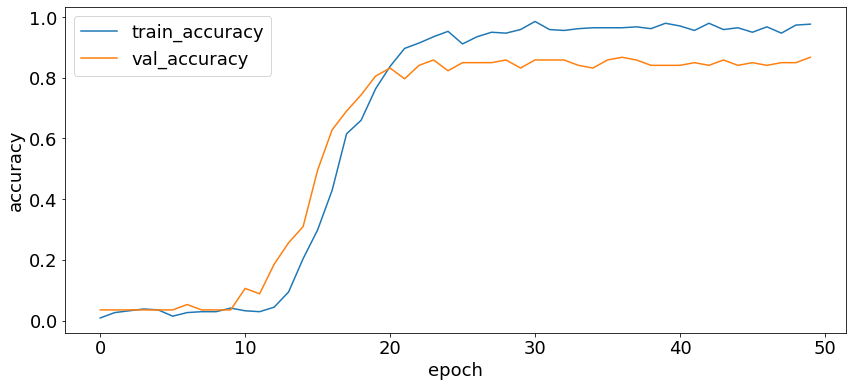

In [514]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()